In [ ]:
import numpy as np
from pymc3 import *
import statsmodels.api as sm
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = "svg"

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Coin Flipping (Uniform priors)

## 1.1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  from ipykernel import kernelapp as app
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [q]


Sampling 3 chains for 1_000 tune and 1_000 draw iterations (3_000 + 3_000 draws total) took 5 seconds.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  from ipykernel import kernelapp as app
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [q]


Sampling 3 chains for 1_000 tune and 1_000 draw iterations (3_000 + 3_000 draws total) took 4 seconds.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  from ipykernel import kernelapp as app
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [q]


Sampling 3 chains for 1_000 tune and 1_000 draw iterations (3_000 + 3_000 draws total) took 4 seconds.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  from ipykernel import kernelapp as app
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [q]


Sampling 3 chains for 1_000 tune and 1_000 draw iterations (3_000 + 3_000 draws total) took 4 seconds.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  from ipykernel import kernelapp as app
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [q]


Sampling 3 chains for 1_000 tune and 1_000 draw iterations (3_000 + 3_000 draws total) took 5 seconds.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  from ipykernel import kernelapp as app
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [q]


Sampling 3 chains for 1_000 tune and 1_000 draw iterations (3_000 + 3_000 draws total) took 5 seconds.


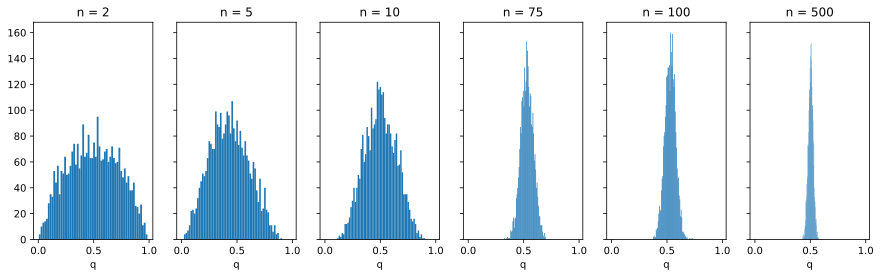

In [ ]:
q = 0.5
flips = [np.random.choice([0,1],p=[1-q,q]) for k in range(500)]
n_range = [2,5,10,75,100,500]
stds = []

fig,axs = plt.subplots(figsize=(15,4),ncols = len(n_range),sharex=True,sharey=True)
j = 0
for n in n_range:

  # run bayesian inference on subset of flips
  coin_flipping = Model()
  with coin_flipping: #
    q = Uniform("q", lower=0, upper=1)
    y = Bernoulli("y", p=q, observed=flips[0:n])
    trace = sample(1000,cores =3)

  # get the samples and save the standard deviation
  q_samples = trace["q"]
  stds.append(np.std(q_samples))

  # make a plot
  axs[j].set_title("n = "+ str(n)) # this gives the plot a title
  axs[j].hist(trace["q"],60)
  axs[j].set_xlabel("q")
  j = j+1

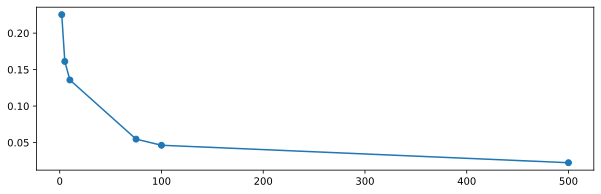

In [ ]:
fig,ax = plt.subplots(figsize=(10,3))
ax.plot(n_range,stds,"o-")

As $n$ increases the posterior distribution is becoming more concentrated around around $0.5$. This is because we have more data and it is less likely we could have generated that data using a value of $q$ which is closer to $0$ or $1$. 

## 1.2

For a Normal distribution, there is approximately a $95\%$ chance that samples are within the mean $\pm 2\sigma$. It looks like the mean of the posterior is around $0.5$, so to be $95\%$ confident that $q$ is within $(0.4,0.6)$, we would want $2\sigma = 0.1$, or $\sigma = 0.05$. It looks like we need around $100$ samples for this to happen.  

Some people noticed that depending on the exact sequence of flips you generate, the mean of the posterior distribution is not that close to $0.5$ even with 100 flips, although it was for me the few times I ran it. However, if the mean is quite off a safer estimate would be $n=500$. 

## 1.3

First we peroform bayesian inference with $6$ tails as our data

In [ ]:
  flips = [0,0,0,0,0,0]
  coin_flipping = Model()
  with coin_flipping: #
    q = Uniform("q", lower=0, upper=1)
    y = Bernoulli("y", p=q, observed=flips)
    trace = sample(1000,cores =3)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [q]


Sampling 3 chains for 1_000 tune and 1_000 draw iterations (3_000 + 3_000 draws total) took 4 seconds.
The acceptance probability does not match the target. It is 0.8874433603114995, but should be close to 0.8. Try to increase the number of tuning steps.


There are two ways to do this, either you can make a loop and "simulate" flipping 6 coins in time with values of $q$ from the posterior, then check if they are all tails and count the fraction of simulations you can all tails, or you can do the following:

In [ ]:
np.mean([(1-q)**6 for q in trace["q"]])

0.5458356781477843

# Coin Flipping (non-uniform priors)

## 2.1

We want the bias of the coin, which is $|1-2q|$ to be $0.2$. This means $0.4<q<0.6$. Therefore we want the standard deviation of our priors, $\sigma_q$, to be $0.05$. Solving for $\alpha$ in the standard deviation of the $\beta$ distribution gives us a value of $\alpha = \beta = (1-4\sigma^2)/(8\sigma^2)\approx 50$:

In [ ]:
(1-4*0.05**2)/(8*0.05**2)

49.49999999999999

## 2.2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  # This is added back by InteractiveShellApp.init_path()
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [q]


Sampling 3 chains for 1_000 tune and 1_000 draw iterations (3_000 + 3_000 draws total) took 5 seconds.
The acceptance probability does not match the target. It is 0.8800184745589631, but should be close to 0.8. Try to increase the number of tuning steps.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  # This is added back by InteractiveShellApp.init_path()
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [q]


Sampling 3 chains for 1_000 tune and 1_000 draw iterations (3_000 + 3_000 draws total) took 5 seconds.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  # This is added back by InteractiveShellApp.init_path()
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [q]


Sampling 3 chains for 1_000 tune and 1_000 draw iterations (3_000 + 3_000 draws total) took 5 seconds.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  # This is added back by InteractiveShellApp.init_path()
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [q]


Sampling 3 chains for 1_000 tune and 1_000 draw iterations (3_000 + 3_000 draws total) took 5 seconds.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  # This is added back by InteractiveShellApp.init_path()
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [q]


Sampling 3 chains for 1_000 tune and 1_000 draw iterations (3_000 + 3_000 draws total) took 5 seconds.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  # This is added back by InteractiveShellApp.init_path()
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [q]


Sampling 3 chains for 1_000 tune and 1_000 draw iterations (3_000 + 3_000 draws total) took 5 seconds.


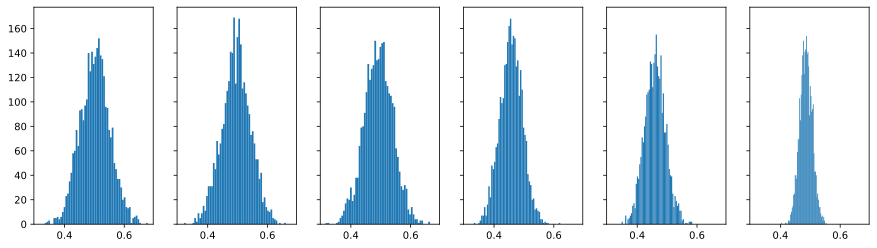

In [ ]:
fig,axs = plt.subplots(figsize=(15,4),ncols = len(n_range),sharex=True,sharey=True)
j = 0
stds = []
for n in n_range:

  # run bayesian inference on subset of flips
  coin_flipping = Model()
  with coin_flipping: #
    q = Beta("q", alpha=50, beta=50)
    y = Bernoulli("y", p=q, observed=flips[0:n])
    trace = sample(1000,cores =3)

  # get the samples and save the standard deviation
  q_samples = trace["q"]
  stds.append(np.std(q_samples))

  # make a plot

  axs[j].hist(trace["q"],60)
  j = j+1

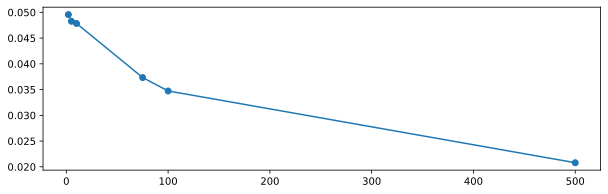

In [ ]:
fig,ax = plt.subplots(figsize=(10,3))
ax.plot(n_range,stds,"o-")

In this case adding more data does not change the posterior distribution as much. This is because we already have fairly strong priors telling us the coin is fair. As a result, as we add more data it doesn't change what we believe about $q$. 

# Priors predictive simulations

## 3.1

The chance advantage of the incumbent for a given value of $x$ is the average difference in their vote share from the non-incumbents, so for this to be at least $10\%$, we want $\bar{y} = 1\times a + b > 55$. 

In [ ]:
count = 0 
n_samps = 10000
for k in range(n_samps):
  a = np.random.normal(0,2)
  b = np.random.normal(50,4)
  if a + b>55:
    count = count+1
count/n_samps

0.134

Some people had a different understanding of the term "advantage" and took this to mean the actual vote share predicted by the model including noise, not the average vote share. This is makes sense too and I realize the wording was vague, so I'll accept this as an answer. In this case you want to simulate an election for each value of $a$, $b$ and $\sigma$ and count the fraction where the vote share is greater than $55$:

In [ ]:
count = 0 
n_samps = 10000
for k in range(n_samps):
  a = np.random.normal(0,2)
  b = np.random.normal(50,4)
  lnsigma = np.random.normal(1.4,2)
  vote_share = np.random.normal(a+b,np.exp(lnsigma))
  if vote_share>55:
    count = count+1
count/n_samps

0.25

**Whatever you did, I'd review the solution to make sure you understand both solutions and why they are different.**